## Visualize holidays to identify any patterns in lead and lag effects
For each holiday, compare wait time with week before and after for each year

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from dbhelper import pd_query

In [265]:
query = '''
        select 
            c.date,
            waittime,
            year,
            month,
            dayofmonth,
            week,
            dayofweek,
            minofday,
            labor,
            newyears,
            us_mlk,
            us_washington,
            us_memorial,
            us_independence,
            us_columbus,
            us_veterans,
            us_thanksgiving,
            xmas,
            ca_goodfriday,
            ca_victoria,
            ca_canada,
            ca_civic,
            ca_thanksgiving,
            mothers,
            ca_family
        from mungedata c
        join datefeatures d on c.date = d.date
        left join publicholiday h on c.date::timestamp::date = h.date
        where
            crossing_id = 1
            and munger_id = 2
            and (minute = 0 or minute = 30)
        order by c.date;
        '''

df = pd_query(query)

In [266]:
df = df.set_index('date')

In [267]:
lshift2 = df.shift(11, freq='D')
lshift1 = df.shift(4, freq='D')
rshift1 = df.shift(-3, freq='D')
rshift2 = df.shift(-10, freq='D')

In [222]:
def compare_weeks(df, weekdf, maxplot=100):
    plt.figure(figsize=(14,18))
    splot = 0
    for i, row in weekdf.iterrows():
        if splot == maxplot:
            break
            
        dt = i
        splot += 1

        plt.subplot(10, 1, splot)

        legend = False
        if ~pd.isnull(df[(lshift2.index >= dt) & (lshift1.index < dt)].tshift(7, freq='D').waittime).all():
            plt.plot(df[(lshift2.index >= dt) & (lshift1.index < dt)].tshift(7, freq='D').waittime, color='b', label='before', alpha=.5)
            legend= True
        
        if ~pd.isnull(df[(lshift1.index >= dt) & (rshift1.index < dt)].waittime).all():
            plt.plot(df[(lshift1.index >= dt) & (rshift1.index < dt)].waittime, color='r', label='holiday')
            legend= True
        
        if ~pd.isnull(df[(rshift1.index >= dt) & (rshift2.index < dt)].tshift(-7, freq='D').waittime).all():
            plt.plot(df[(rshift1.index >= dt) & (rshift2.index < dt)].tshift(-7, freq='D').waittime, color='g', label='after', alpha=.5)
            legend= True

        if legend:
            plt.legend()

    plt.tight_layout()
    plt.show()
    

## Thanksgiving
* Hi: +10
* Lo: +1

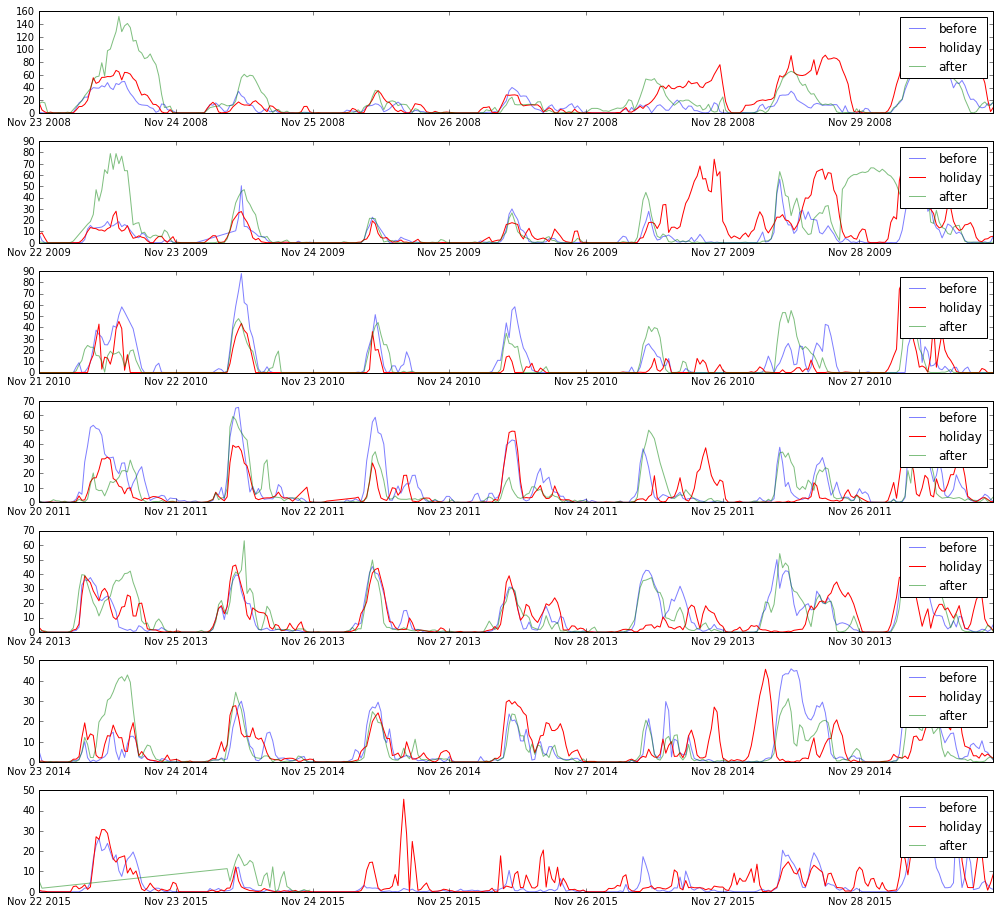

In [249]:
thanksgiving = df[df.us_thanksgiving == True][['year', 'week']].drop_duplicates()

compare_weeks(df, thanksgiving)

## Labor Day

In [250]:
labor = df[df.labor == True][['year', 'week']].drop_duplicates()

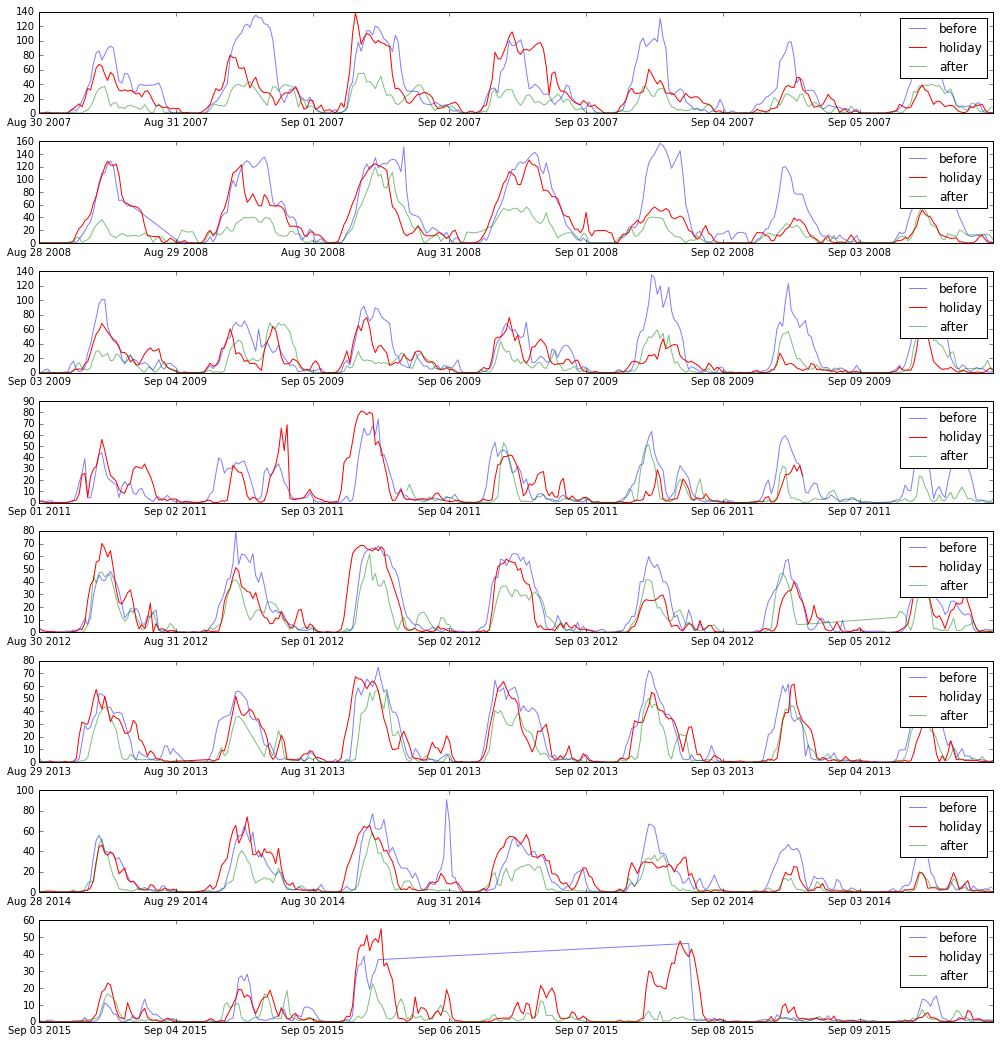

In [251]:
compare_weeks(df, labor)

## Xmas

In [252]:
xmas = df[df.xmas == True][['year', 'week']].drop_duplicates()

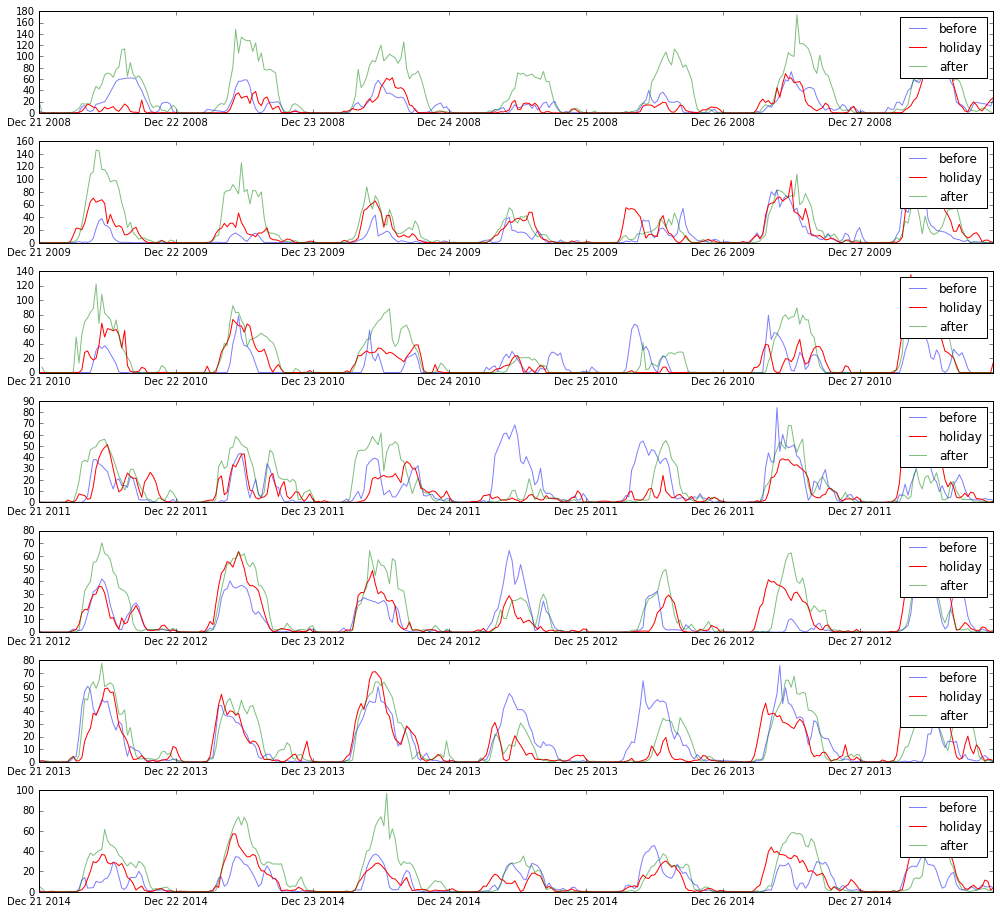

In [254]:
compare_weeks(df, xmas)

## New Years
* Hi: afternoon of NY, -2, +1
* Low: -1

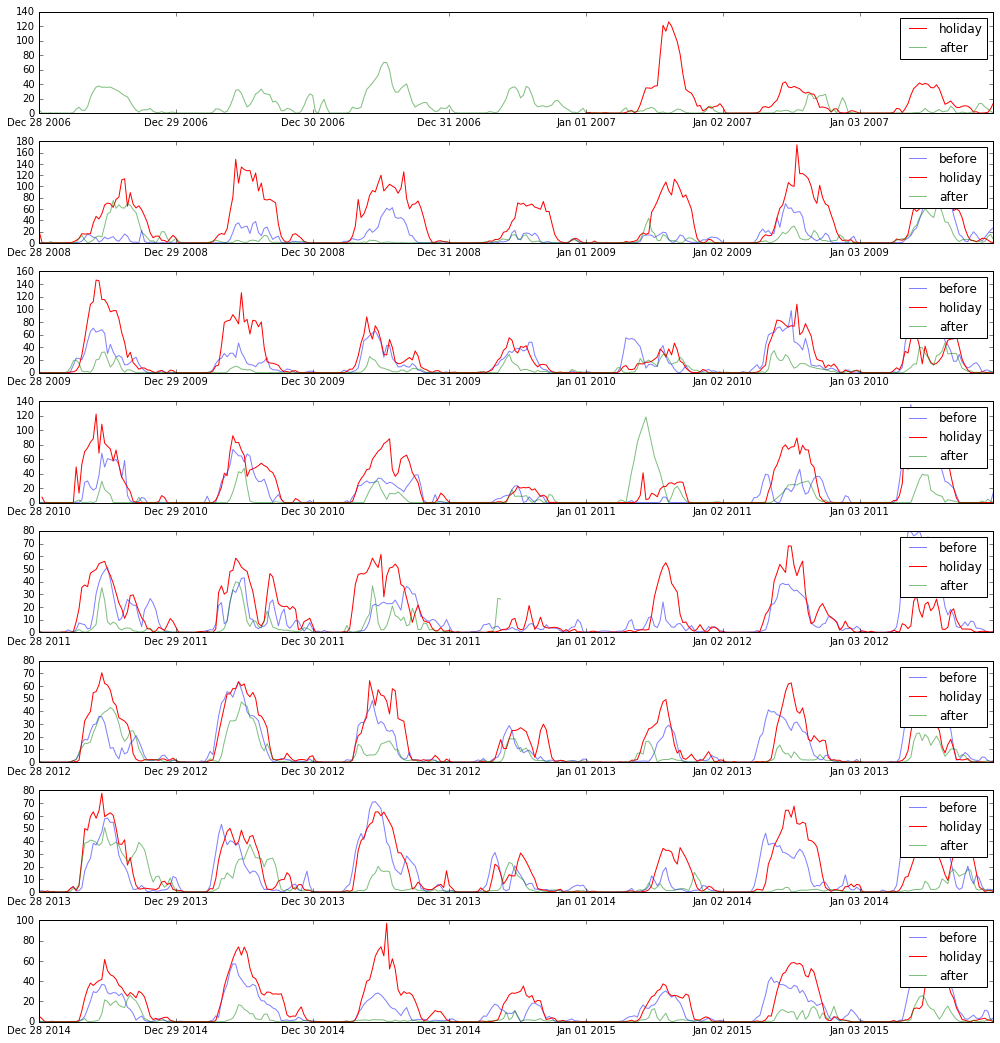

In [255]:
newyears = df[df.newyears == True][['year', 'week']].drop_duplicates()
compare_weeks(df, newyears)

## Memorial Day
Hi: -8, -9
Lo: -1

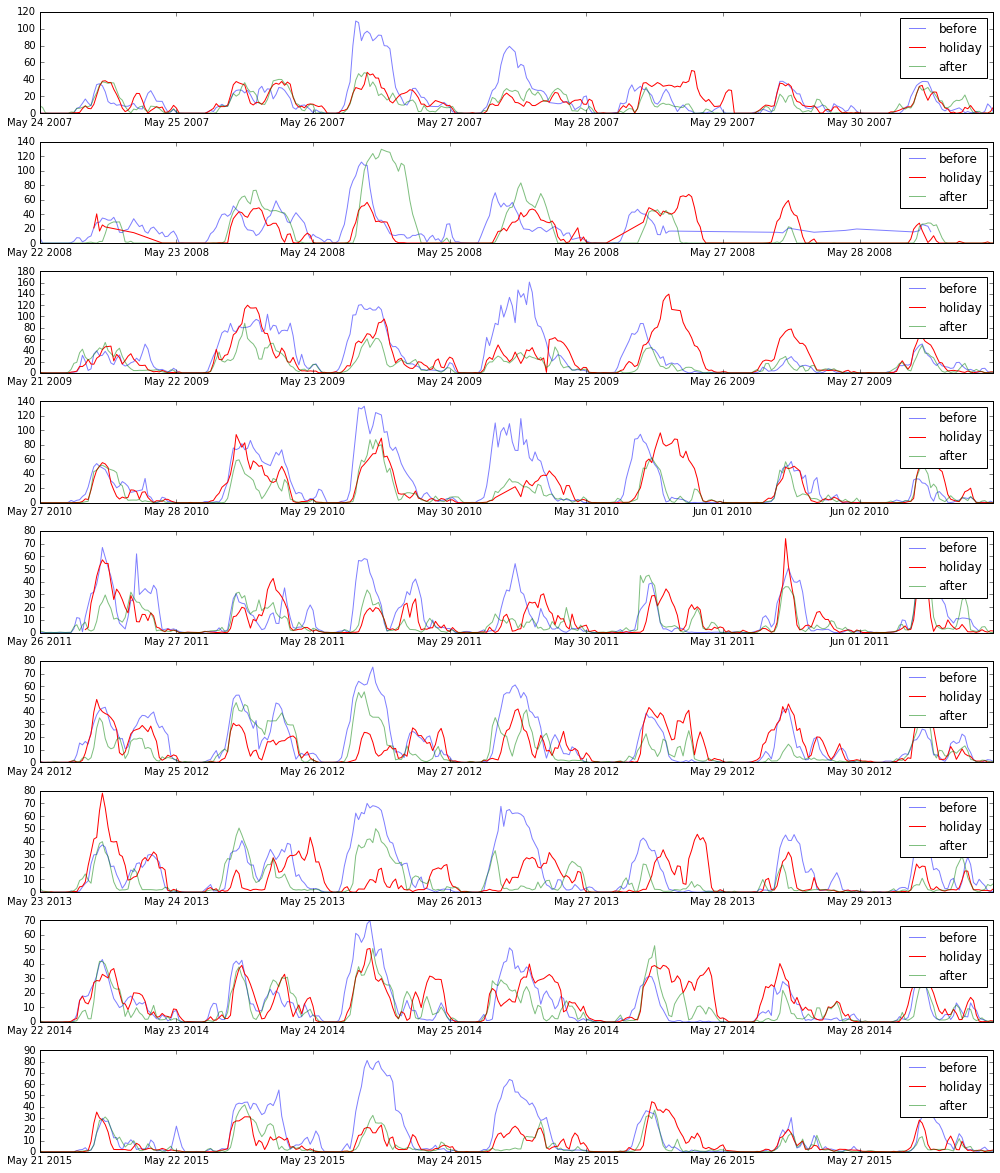

In [256]:
memorial = df[df.us_memorial == True][['year', 'week']].drop_duplicates()
compare_weeks(df, memorial)

## Independence
Hi: -4 if on Fri or Sat
Lo: 0

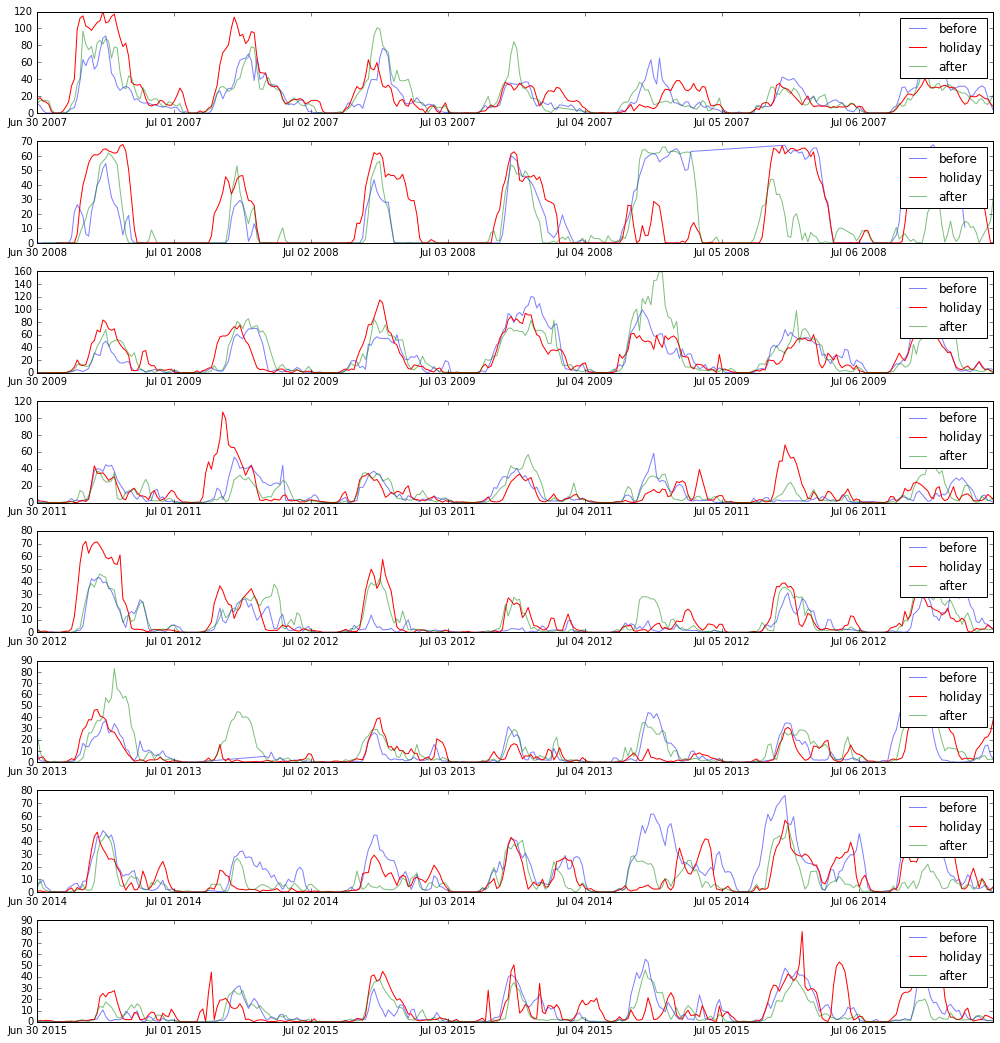

In [257]:
independence = df[df.us_independence == True][['year', 'week']].drop_duplicates()
compare_weeks(df, independence)

Friday before heavier

## Veterans

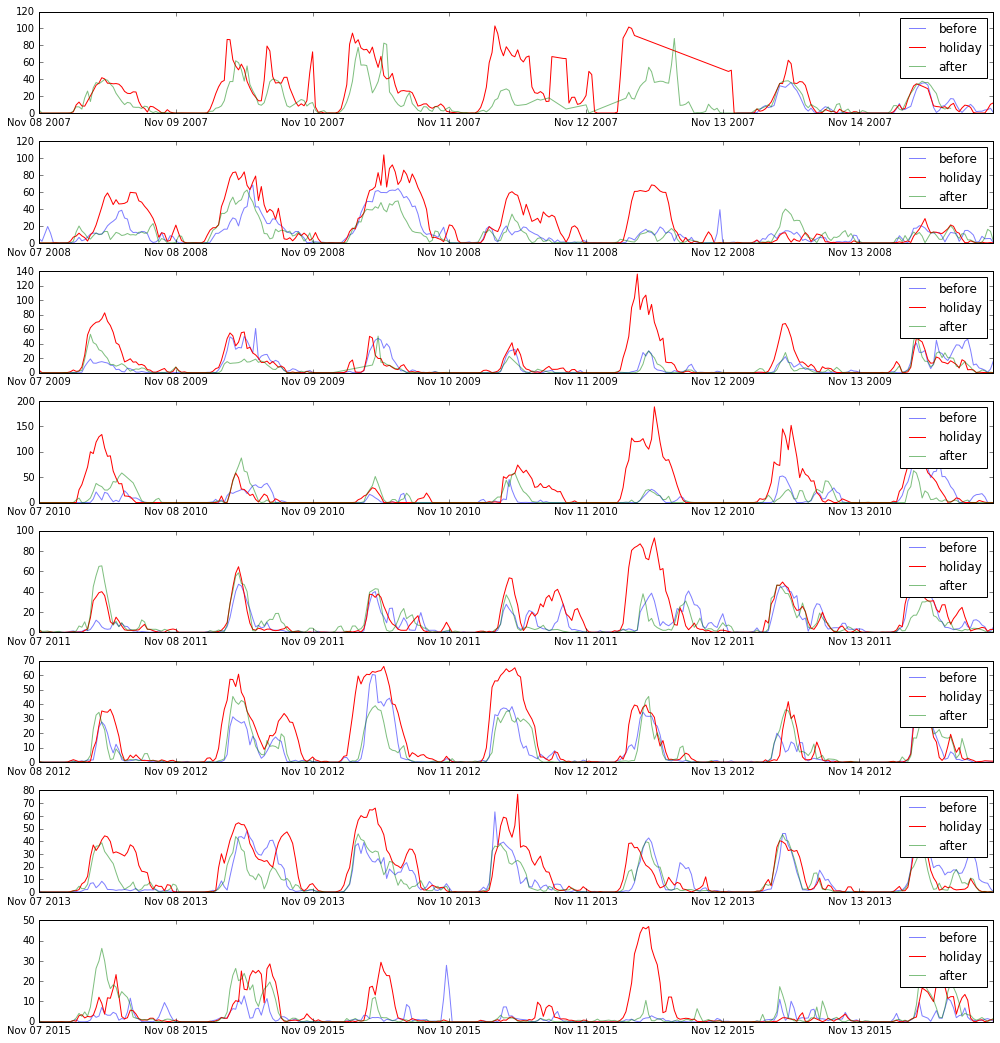

In [258]:
veterans = df[df.us_veterans == True][['year', 'week']].drop_duplicates()
compare_weeks(df, veterans)

* heavier: vday, -1, -2

During weekday, veterans day is heavier
Friday before heavier when v day on weekend 

## Good Friday
Hi: 0, -1
Lo: +2

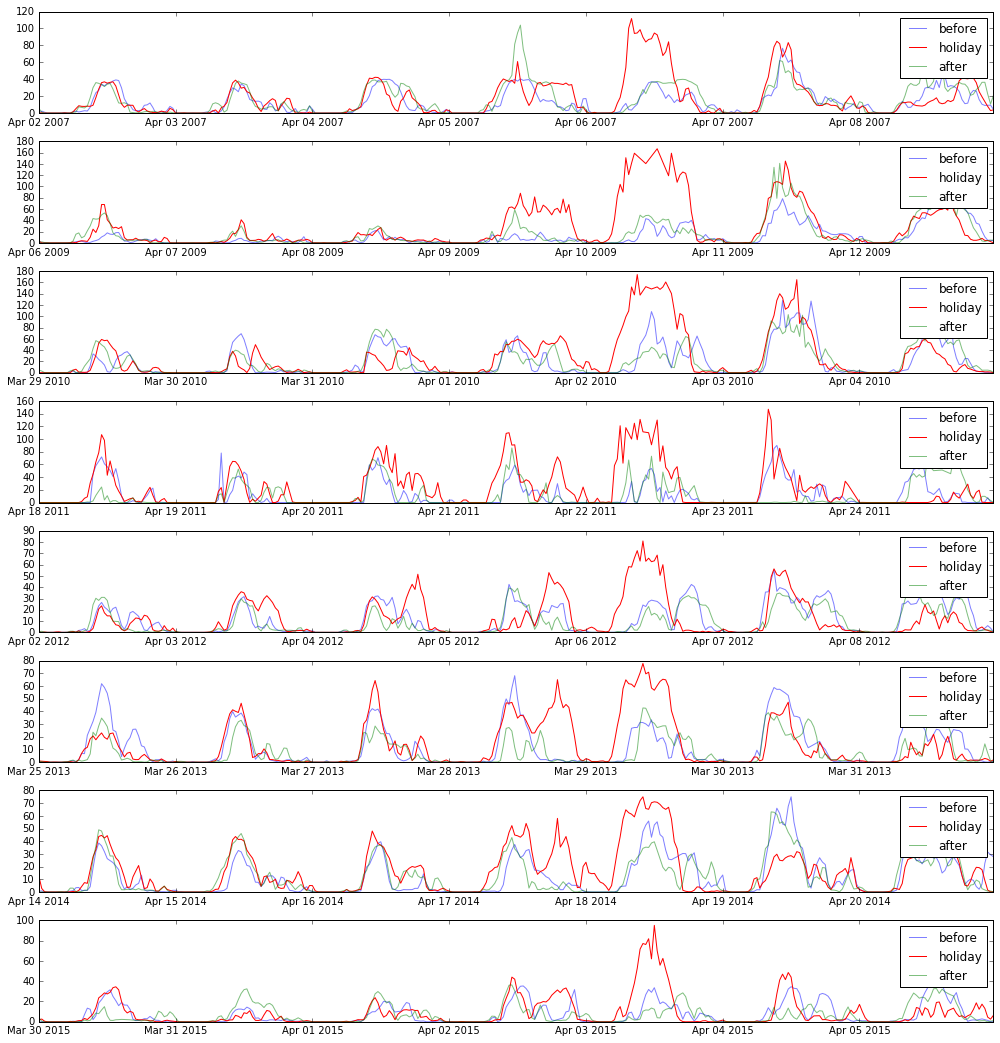

In [259]:
friday = df[df.ca_goodfriday == True][['year', 'week']].drop_duplicates()
compare_weeks(df, friday)

## Columbus
No clear patterns

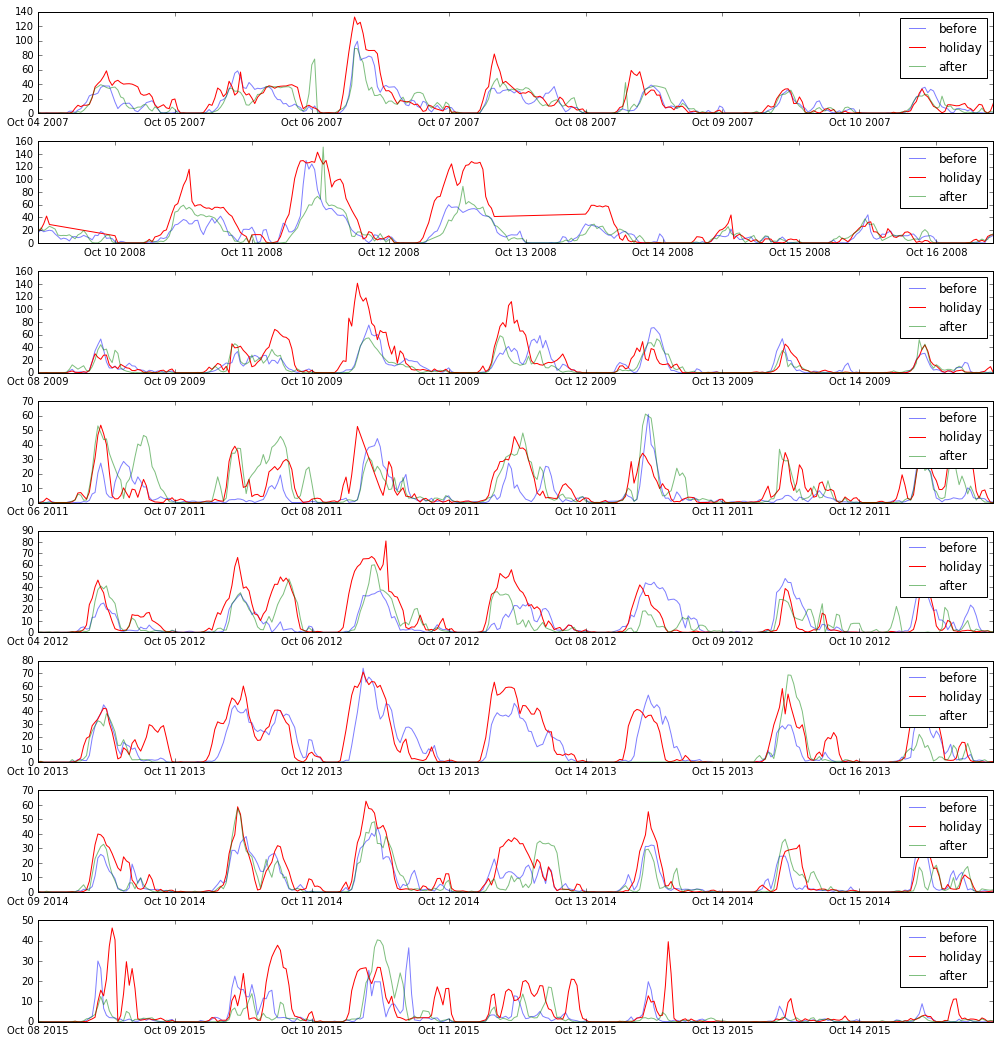

In [260]:
columbus = df[df.us_columbus == True][['year', 'week']].drop_duplicates()
compare_weeks(df, columbus)

## MLK
Hi: 0
Lo: ?

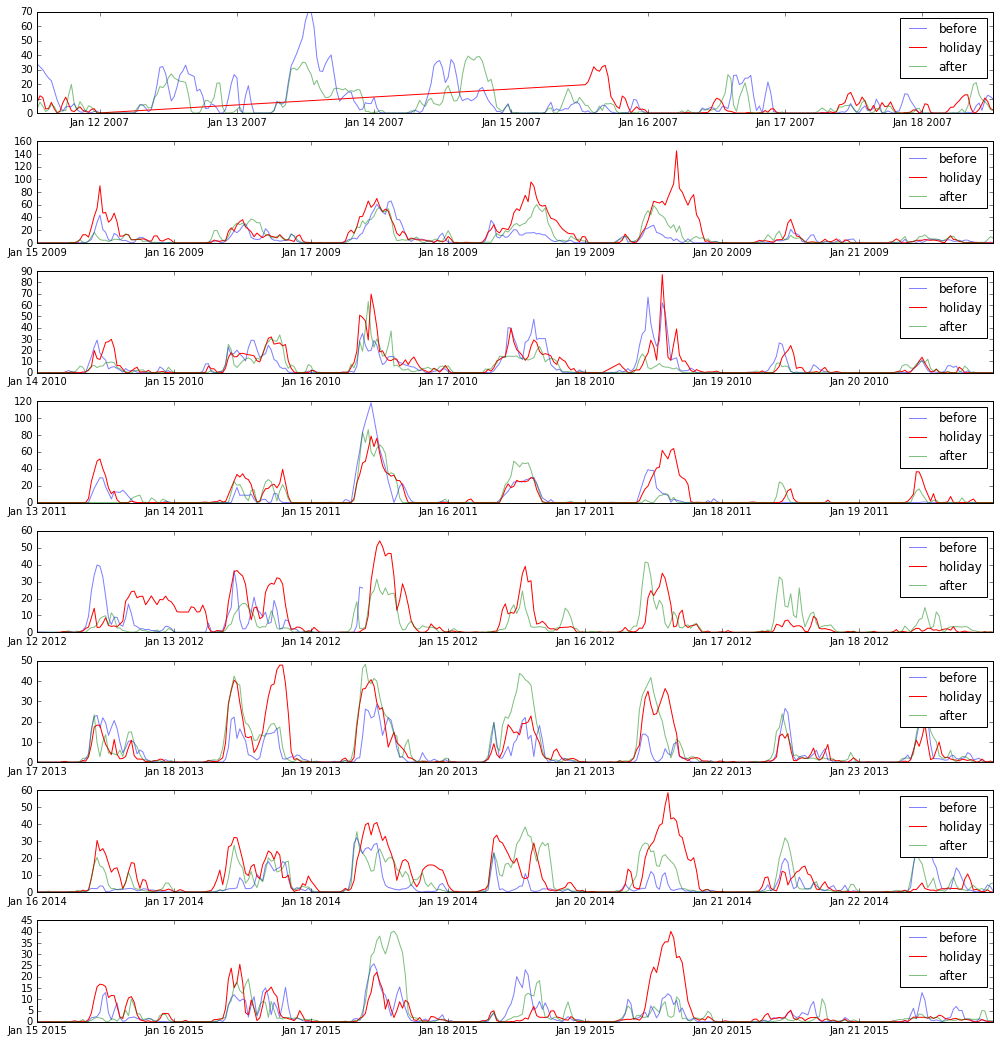

In [261]:
mlk = df[df.us_mlk == True][['year', 'week']].drop_duplicates()
compare_weeks(df, mlk)

## Washington
Hi: 0
Lo: ?

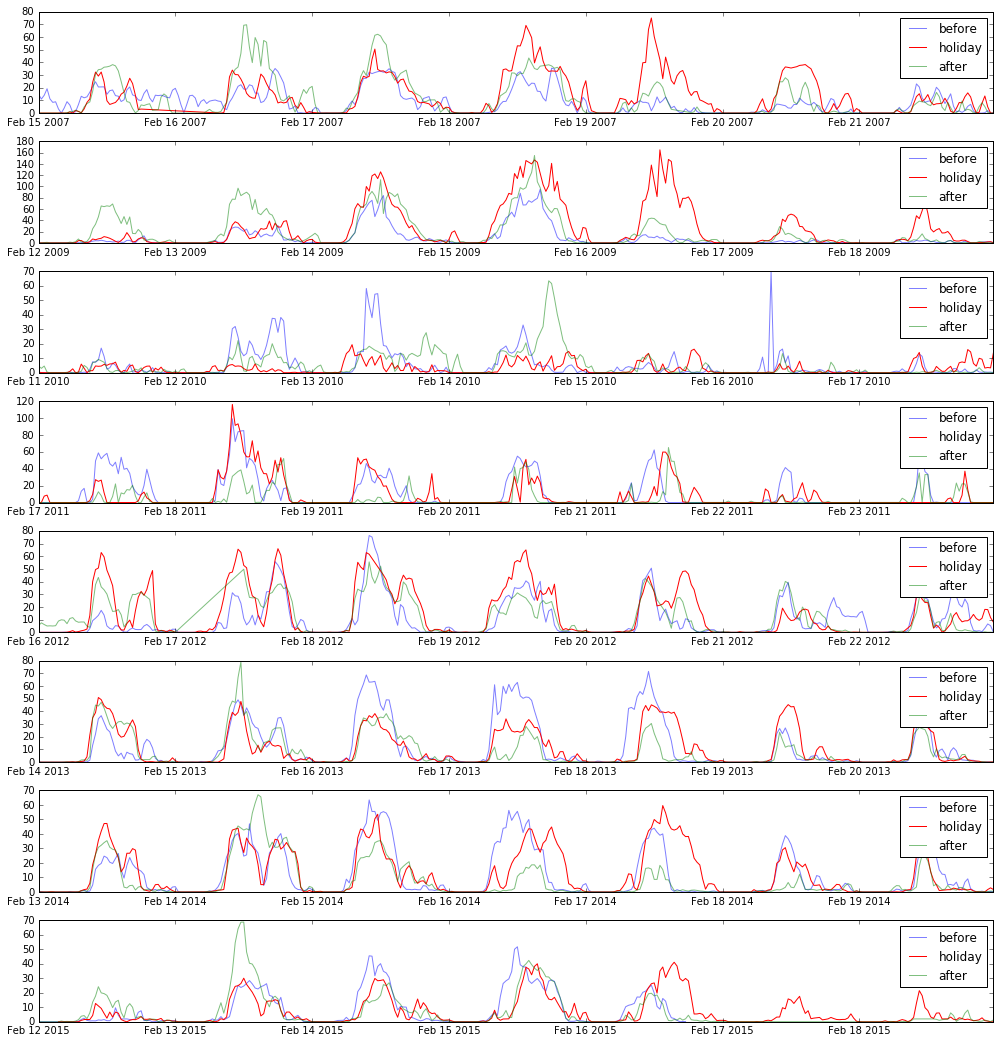

In [262]:
washington = df[df.us_washington == True][['year', 'week']].drop_duplicates()
compare_weeks(df, washington)

## Mothers
Hi: +6, +7
Lo: 

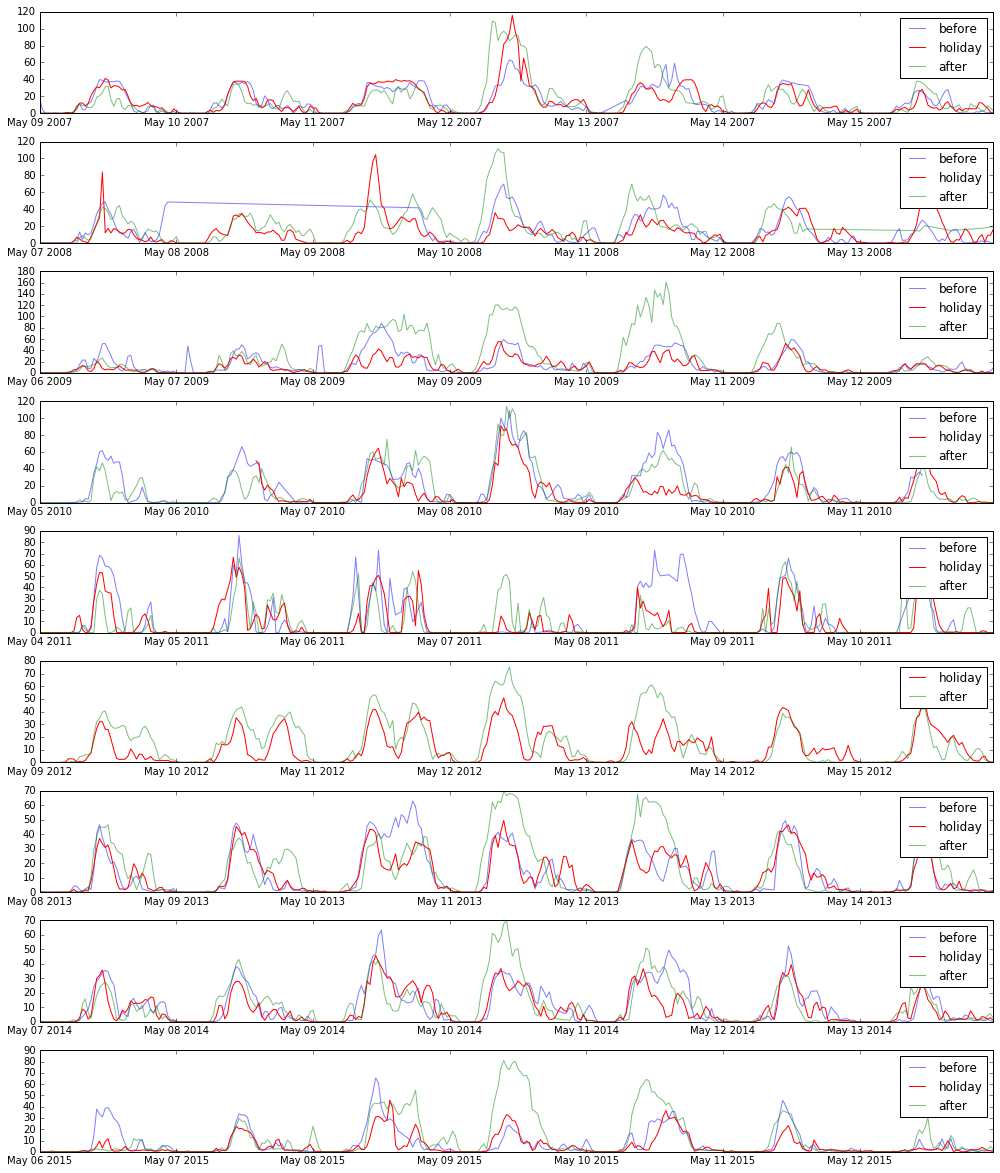

In [268]:
mother = df[df.mothers == True][['year', 'week']].drop_duplicates()
compare_weeks(df, mother)

## Canada
* Hi: -2, -3 slight

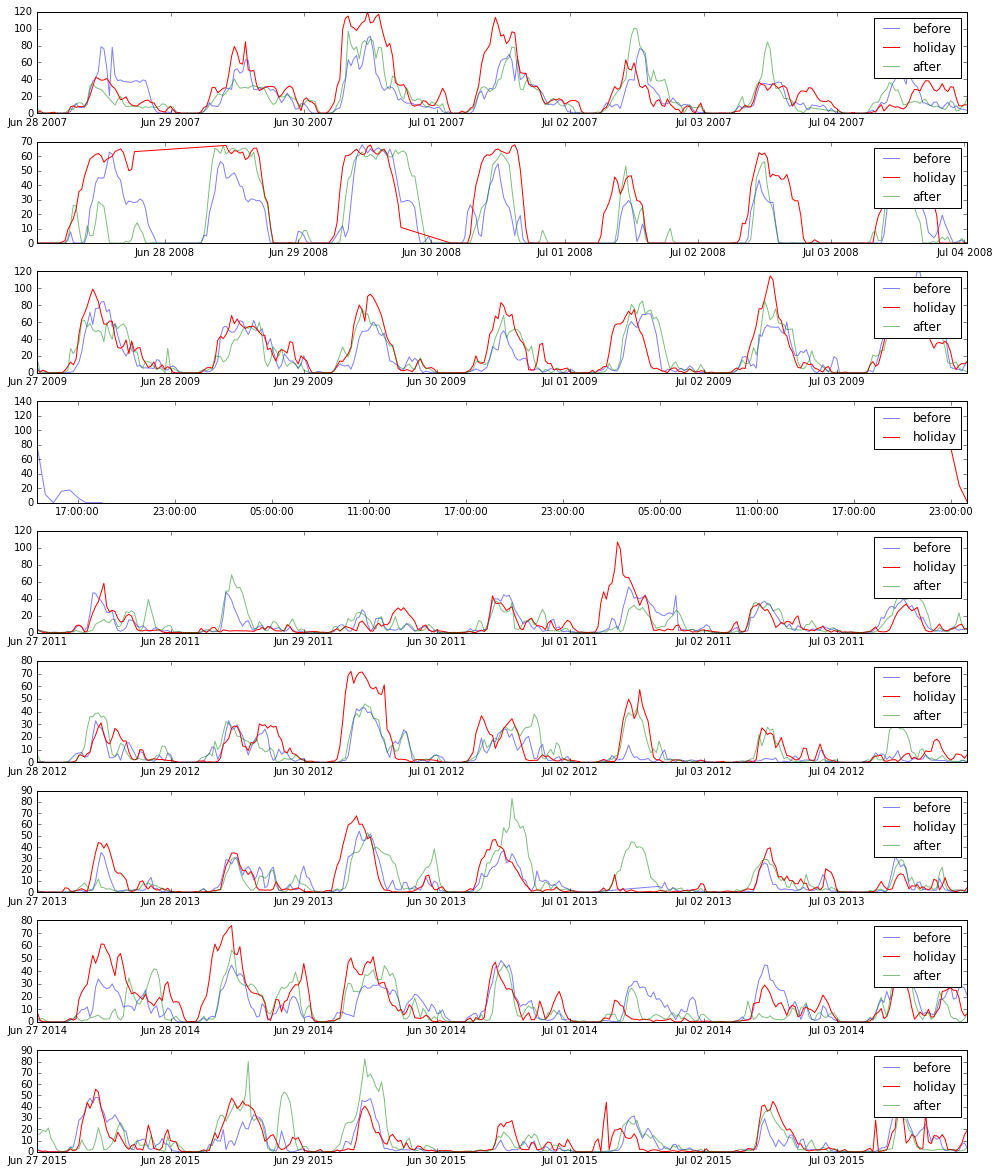

In [269]:
canada = df[df.ca_canada == True][['year', 'week']].drop_duplicates()
compare_weeks(df, canada)

## Victoria
* Hi: -1, -2, +7 (mothers day?)

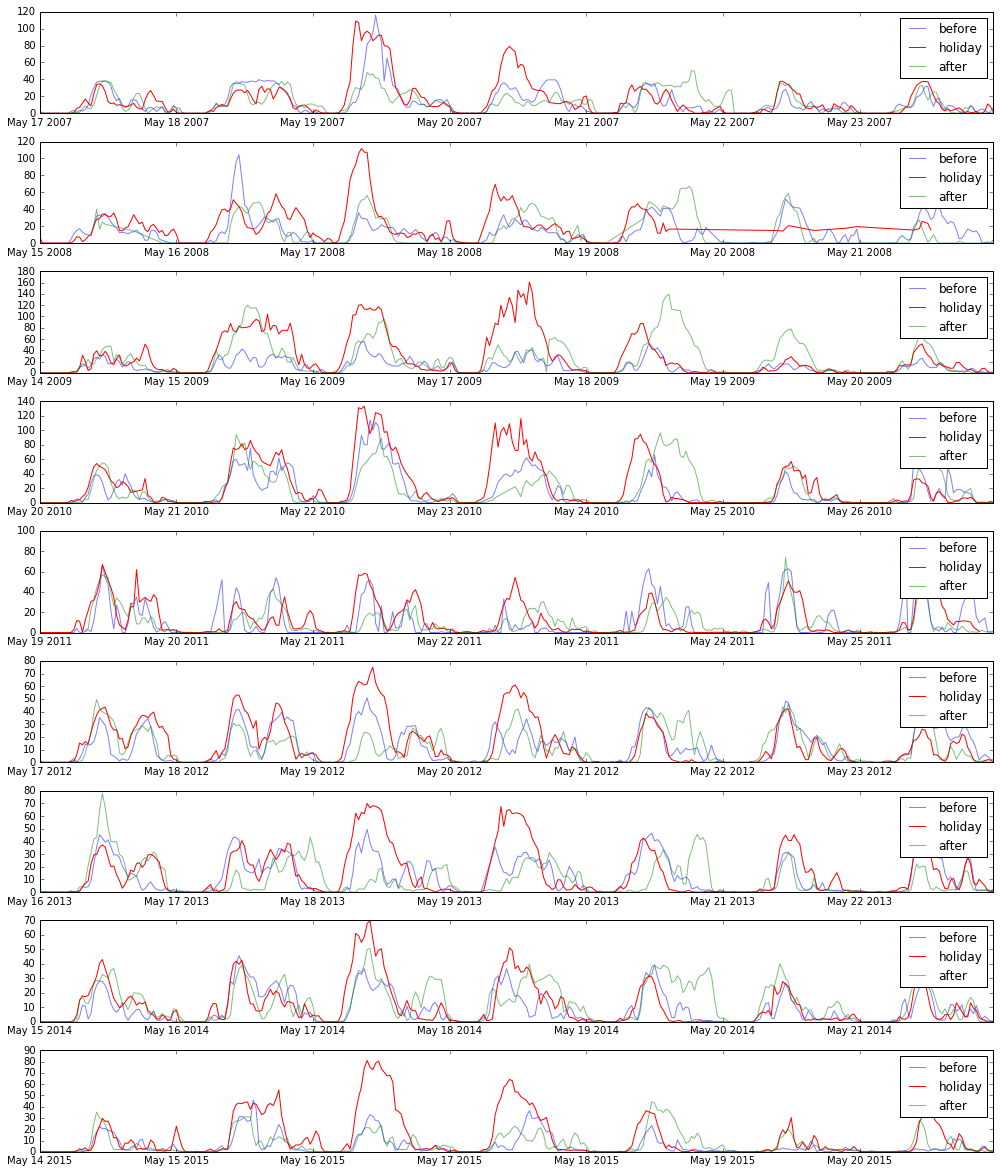

In [270]:
victoria = df[df.ca_victoria == True][['year', 'week']].drop_duplicates()
compare_weeks(df, victoria)

## Possible features to generalize holidays
1. Observed holiday only
2. Lead and lag days from each holiday, +/- 4
3. Not every holiday merits full 4 day lead/lag
4. Options to code lags
    1. boolean, e.g. xmas_p1, xmax_m2
    2. numeric, e.g. xmas_days = -1, 0, 1, 2, etc.